In [ ]:
# This part you need to run once per project, which I have already done, so it is commented out. 
# It imports necessary databases (possibly a lengthy process), and backs up the project directory 
# so that it is saved in the home directory. The backed up project can be used by other project 
# collaborators without the need to import any databases again. The next section starts with restoring 
# the saved project from directory.

# import bw2data as bd
# import bw2calc as bc
# import bw2io as bi
# import numpy as np

# ei_path = "/Users/akim/Documents/LCA_files/ecoinvent_38_cutoff/datasets"
# ei_name = "ecoinvent 3.8 cutoff"

# bd.projects.set_current("Building paper")

In [ ]:
# # Import biosphere
# bi.bw2setup()

In [ ]:
# # Import ecoinvent
# if ei_name in bd.databases:
#     print("database already exists")
# else:
#     ei = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
#     ei.apply_strategies()
#     assert ei.all_linked
#     ei.write_database()

In [ ]:
# bi.backup_project_directory("Building paper")

In [2]:
import os
os.chdir("/home/shinder/0_work/1_Models/2_building/2a_integrations/model_building/building-model/model_lca")

import bw2data as bd
import bw2calc as bc
import bw2io as bi
import numpy as np

# Only need to run this once! Otherwise you might work on this project, eg import `building lci` database, 
# but then overwrite it if you restore it from the backup
# fp_building_bw_project = "brightway2-project-Building paper-backup.19-September-2022-03-55PM.tar.gz"
# bi.restore_project_directory(fp_building_bw_project)

In [3]:
bd.projects.set_current("Building paper")
bd.databases

Databases dictionary with 3 object(s):
	biosphere3
	building lci
	ecoinvent 3.8 cutoff

In [4]:
# Import foreground database from excel

# delete database 
# -- doesn't hurt to do it every time you run the code, because it is very fast, but your database is then always updated
# del bd.databases["building lci"]  

# if "building lci" not in bd.databases:
fp_building_lci_excel = "building_lci.xlsx"
bld = bi.ExcelImporter(fp_building_lci_excel)
bld.apply_strategies()
bld.match_database("ecoinvent 3.8 cutoff", fields=("name", "location"))
bld.match_database()

if bld.all_linked:
    bld.write_database()
else:
    bld.statistics()

Extracted 3 worksheets in 0.13 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 15.31 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
24 datasets
117 exchanges
0 unlinked exchanges
  


0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2023 15:09:39
  Finished: 01/10/2023 15:09:39
  Total time elapsed: 00:00:00
  CPU %: 146.90
  Memory %: 0.08
Created database: building lci


In [ ]:
list (bld.unlinked)

In [ ]:
# LCIA
bld = bd.Database("building lci")

n =12 #number of buildings
for x in range(1,n+1):
    building_name = str("building ")+str(x)
    demand_act = [act for act in bld if building_name in act['name']]
#     assert len(demand_act) == 1
    demand_act = demand_act[0]

    method = ('IPCC 2013', 'climate change', 'GWP 100a')

    lca = bc.LCA({demand_act: 1}, method)
    lca.lci()
    lca.lcia()
    print(building_name, lca.score)

In [11]:
import pandas as pd
df_lci = pd.read_excel(open('Material_inventory_mapping.xlsx', 'rb'), sheet_name='Component wise inventories')  

In [13]:
df_lci['Viola material']

0               12 cm X 16 cm timber frame construction 
1                               3-layer solid wood panel
2                    3-layer solid wood panel PVAc-bound
3              5-layer insulated (glass wool) wood panel
4      8cm x 12cm timber frame construction with inte...
                             ...                        
157    Timber frame construction with intermediate ro...
158                  Vapour barrier of polyethylene (PE)
159             Vapour barrier of polypropylene nonwoven
160                                           Wind paper
161                       Wood wool board, cement bonded
Name: Viola material, Length: 162, dtype: object

In [152]:
x = "heat production, natural gas, at boiler condensing modulating <100kW"
# y = "mix"
ei =    bd.Database("ecoinvent 3.8 cutoff")
demand_act = [act for act in ei if x in act['name'] and 'CH' in act['location']]
method = ('IPCC 2013', 'climate change', 'GWP 100a')
demand_act = demand_act[0]
print(demand_act)
lca = bc.LCA({demand_act: 1}, method)
lca.lci()
lca.lcia()
print(lca.score)

'heat production, natural gas, at boiler condensing modulating <100kW' (megajoule, CH, None)
0.07010865355349419


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
os.chdir('/home/shinder/0_work/1_Models/2_building/2a_integrations/model_building/building-model/')

In [55]:
u_floor = pd.read_excel('model_material/2_U_values/U-Values_final.xlsx',sheet_name='floor')

In [56]:
u_roof = pd.read_excel('model_material/2_U_values/U-Values_final.xlsx',sheet_name='roof')

In [57]:
u_wall = pd.read_excel('model_material/2_U_values/U-Values_final.xlsx',sheet_name='wall')

In [65]:
values_floor, base_floor = np.histogram(u_floor['thermal conductivity'],bins=40)
values_roof, base_roof = np.histogram(u_roof['thermal conductivity'],bins=40)
values_wall, base_wall = np.histogram(u_wall['thermal conductivity'],bins=40)

In [66]:
cumulative_floor = np.cumsum(values_floor)
cumulative_roof = np.cumsum(values_roof)
cumulative_wall = np.cumsum(values_wall)

(10.35, 45.0)

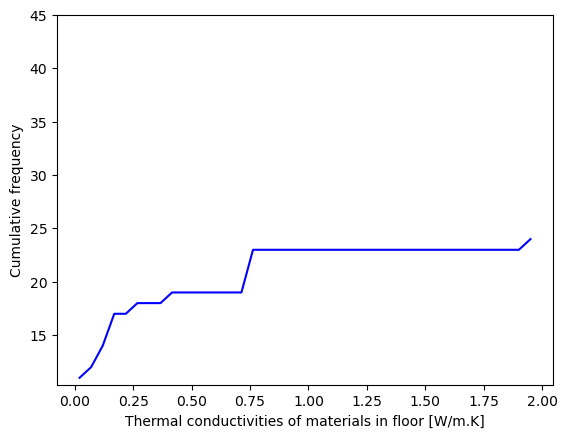

In [82]:
plt.plot(base_floor[:-1], cumulative_floor, c='blue')
plt.ylabel('Cumulative frequency')
plt.xlabel('Thermal conductivities of materials in floor [W/m.K]')
plt.ylim(top=55)

(10.2, 55.0)

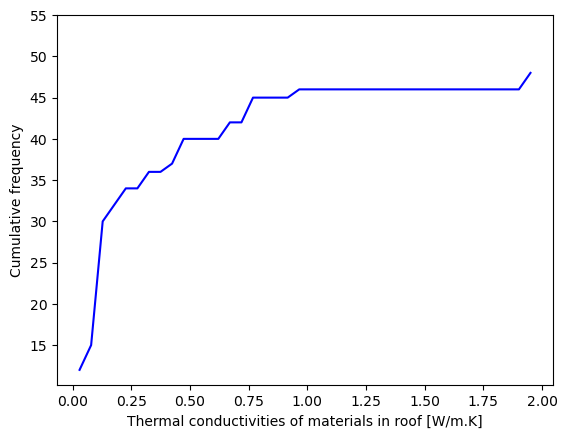

In [83]:
plt.plot(base_roof[:-1], cumulative_roof, c='blue')
plt.ylabel('Cumulative frequency')
plt.xlabel('Thermal conductivities of materials in roof [W/m.K]')
plt.ylim(top=55)

(12.0, 55.0)

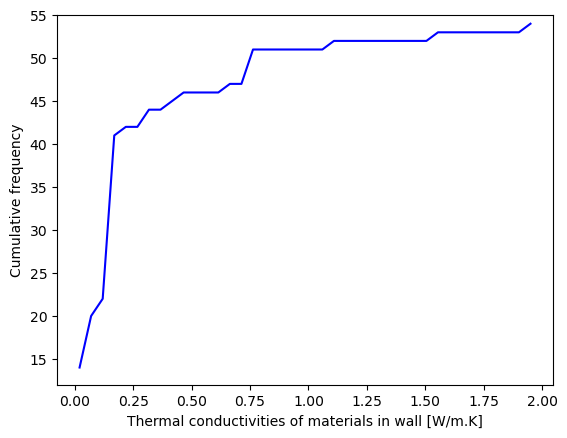

In [84]:
plt.plot(base_wall[:-1], cumulative_wall, c='blue')
plt.ylabel('Cumulative frequency')
plt.xlabel('Thermal conductivities of materials in wall [W/m.K]')
plt.ylim(top=55)

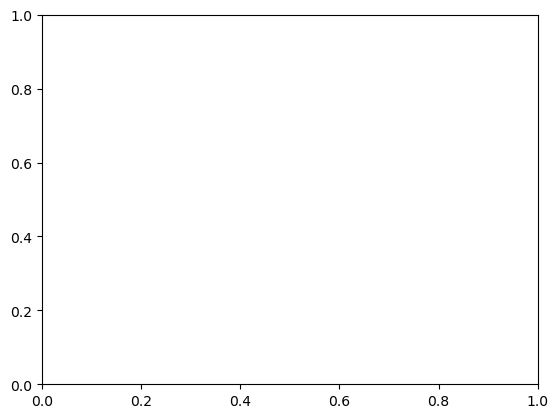

In [68]:
for x,y in zip(base_floor,cumulative_floor):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center